In [29]:
from pathlib import Path
import sys
import seaborn
import numpy as np
import matplotlib.pyplot as plt 

sys.path.append("..")

from metadataset.ftc.metadataset import FTCMetadataset

In [69]:

def get_index(hp_candidates, lr, model_id):

    return np.where((hp_candidates[:,1]==lr) & (hp_candidates[:,model_id+2]==1))[0]

def plot(ax, metadataset, dataset, split):
    metadataset.set_state(dataset_name=dataset,
                            split=split)
    hp_candidates, indices = metadataset._get_hp_candidates_and_indices()
    metrics = metadataset.evaluate_ensembles([indices.tolist()])[2].T
    #metrics = metadataset.evaluate_ensembles([indices])[2].T
    hps_names = metadataset.all_hp_names[metadataset.dataset_name]
    hp_candidates = hp_candidates.numpy()
    models = hps_names[2:]

    #plt.figure()
    for model_id in range(len(models)):
        for lr in [0.0001]:
            idx = get_index(hp_candidates, lr, model_id)
            ax.plot(metrics[idx], label="_".join(models[model_id].split("_")[1:]))
            ax.set_yscale("log")
    ax.set_xticks(np.arange(5))
    ax.set_xticklabels([8,16,32,64,128])
    ax.set_xlabel("LoRA Rank",fontsize=20)
    ax.set_ylabel("Error", fontsize=20)
    ax.set_title(dataset, fontsize=20)
    ax.grid()
    #plt.show()


In [59]:

data_dir = Path("..") / "data" 
data_version = "mini"
#data_version = "extended"
metadataset = FTCMetadataset(data_dir=str(data_dir), 
                             metric_name="error",
                             data_version=data_version)
dataset_names = metadataset.get_dataset_names()
dataset_names

['imdb',
 'mteb/tweet_sentiment_extraction',
 'ag_news',
 'dbpedia_14',
 'stanfordnlp/sst2',
 'SetFit/mnli']

In [32]:
dataset = "ag_news"
#dataset = "imdb"
#dataset = "mteb/tweet_sentiment_extraction"
#dataset = "stanfordnlp/sst2"
dataset = 'dbpedia_14'
dataset = 'SetFit/mnli'
split = "valid"

In [52]:
plot(metadataset, dataset, split="test")
plot(metadataset, dataset, split="valid")

TypeError: plot() missing 1 required positional argument: 'dataset'

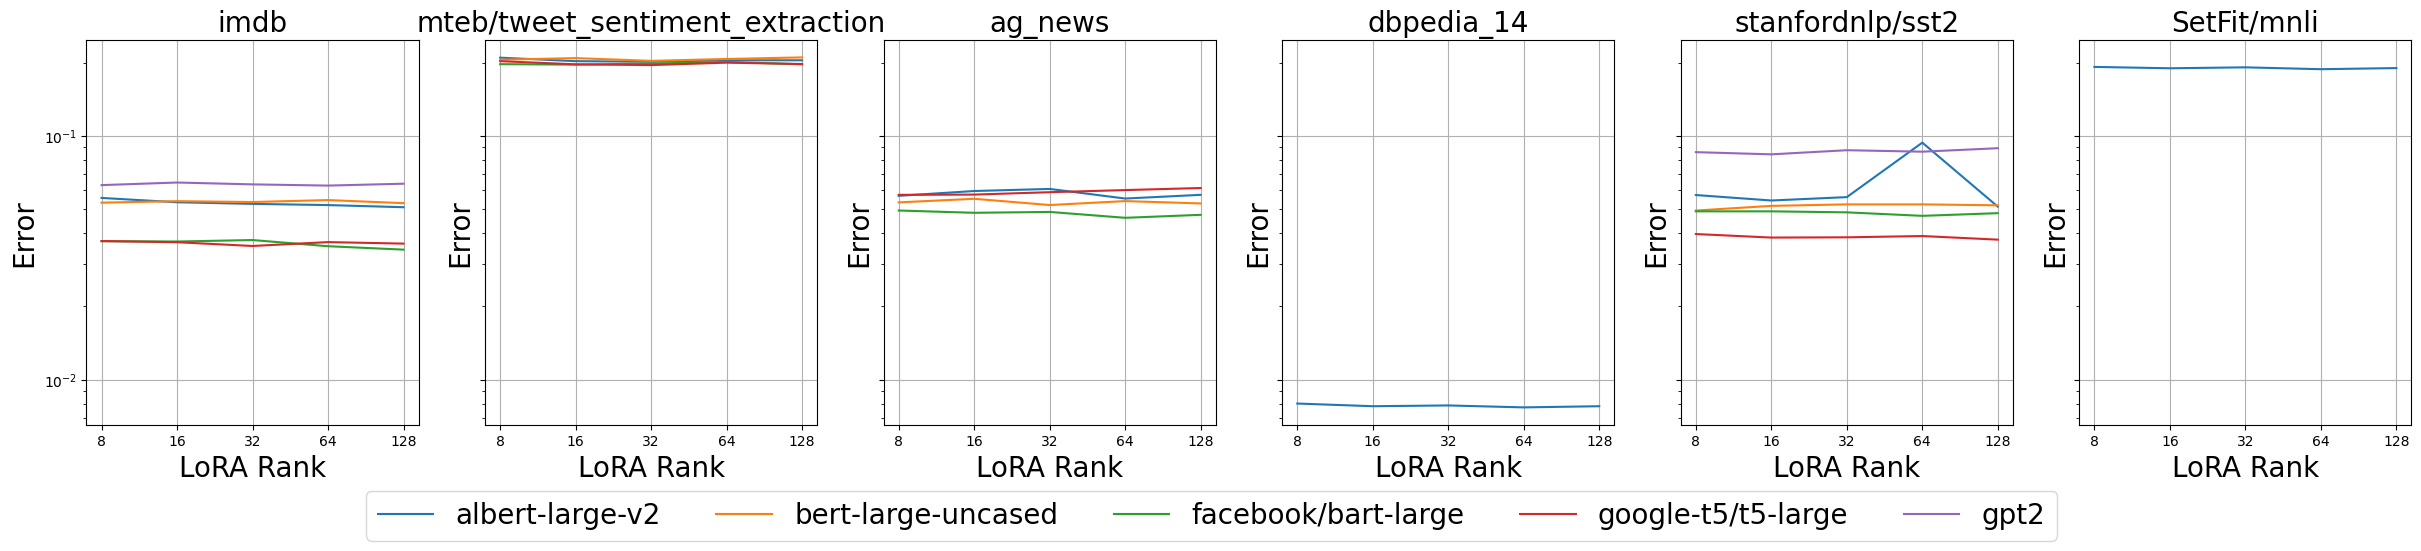

In [71]:
fig, axs = plt.subplots(1, len(dataset_names), figsize=( 5*len(dataset_names),5), sharey=True)

for i, dataset in enumerate(dataset_names):
    plot(axs[i], metadataset, dataset, split="test")
lines_labels = [axs[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.15), fontsize=20)
plt.savefig(f"lora_rank_variation_{data_version}.pdf")


In [14]:
dataset

'imdb'

In [48]:
hps_names = metadataset.all_hp_names[metadataset.dataset_name]

In [50]:
hps_names

Index(['lora_r', 'learning_rate', 'model_gpt2'], dtype='object')